Example using curvefit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Generate synthetic data

In [2]:
Atrue = 1.0
strue = 1.0
x0true = 0.0
Ctrue = 0.5
nois = 0.2
xdata = np.arange(-4,4,0.01)
xnum = len(xdata)
ydata = Atrue*np.exp(-0.5*((xdata-x0true)**2)/(strue**2))+Ctrue+np.random.normal(0,1,xnum)*nois

Define functions used for curve fitting

In [3]:
#function needs to have x, then parameters)
def Gauss(x, A, x0, s):
  return A*np.exp(-0.5*((x-x0)**2)/(s**2))

def GaussPlusConstant(x, A, x0, s, C):
  return A*np.exp(-0.5*((x-x0)**2)/(s**2))+C

Curve Fitting

In [4]:
#every bin has a constant error
err = nois*np.ones(len(xdata))

#this statement does the curve fitting
#function, xdata, ydata
popt, _ = curve_fit(Gauss, xdata, ydata, sigma=err)
#popt is now an array with the best fit for A, x0, and s.

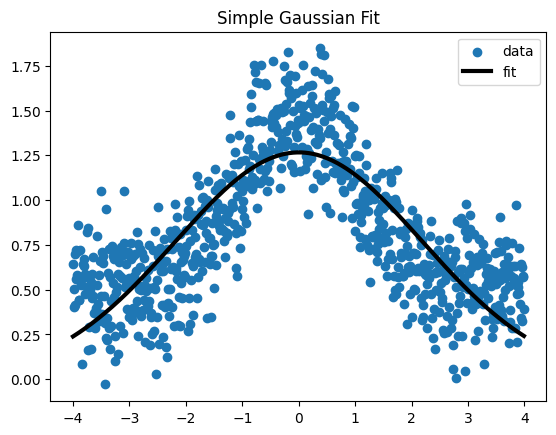

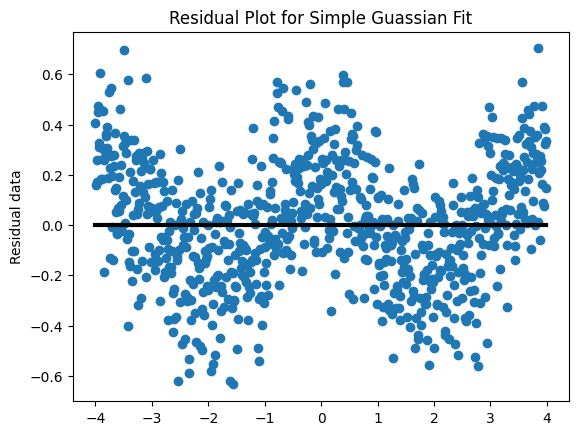

In [5]:
#Plot of the data vs fit
plt.scatter(xdata,ydata,label='data')
plt.plot(xdata,Gauss(xdata,popt[0],popt[1],popt[2]),color='black',linewidth=3,label='fit')
plt.title('Simple Gaussian Fit')
plt.legend()
plt.savefig('day3_curvefit_1.png', bbox_inches='tight')
plt.show()

#The residual is defined to be Data minus Fit
#In a good fit, the residual should be flat with no discernable pattern
plt.scatter(xdata,ydata-Gauss(xdata,popt[0],popt[1],popt[2]))
plt.plot(xdata,0.0*xdata,color='black',linewidth=3)
plt.ylabel('Residual data')
plt.title('Residual Plot for Simple Guassian Fit')
plt.savefig('day3_curvefit_2.png', bbox_inches='tight')
plt.show()

Residual looks bad, let's try another function

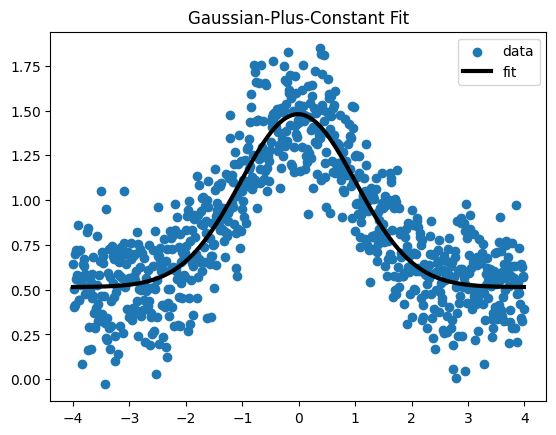

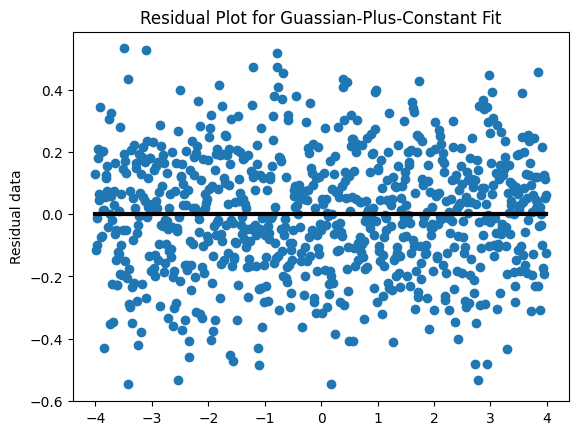

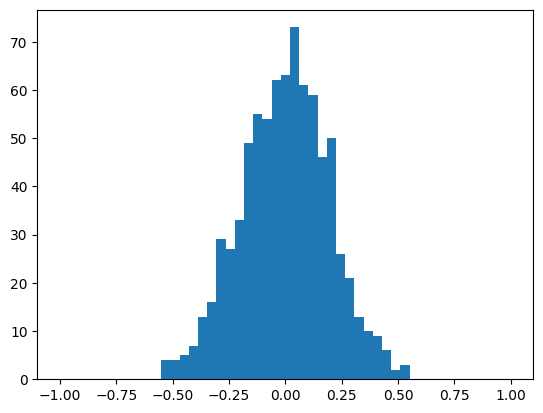

In [6]:
popt, _ = curve_fit(GaussPlusConstant, xdata, ydata, sigma=err)

plt.scatter(xdata,ydata,label='data')
plt.plot(xdata,GaussPlusConstant(xdata,popt[0],popt[1],popt[2],popt[3]),color='black',linewidth=3,label='fit')
plt.title('Gaussian-Plus-Constant Fit')
plt.legend()
plt.savefig('day3_curvefit_3.png', bbox_inches='tight')
plt.show()

#This indicates we picked the right function
plt.scatter(xdata,ydata-GaussPlusConstant(xdata,popt[0],popt[1],popt[2],popt[3]))
plt.plot(xdata,0.0*xdata,color='black',linewidth=3)
plt.ylabel('Residual data')
plt.title('Residual Plot for Guassian-Plus-Constant Fit')
plt.savefig('day3_curvefit_4.png', bbox_inches='tight')
plt.show()

xbins = np.linspace(-1,1,50)
plt.hist((ydata-GaussPlusConstant(xdata,popt[0],popt[1],popt[2],popt[3])),bins=xbins)
plt.show()
